In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

$$
I_1 = \int _0 ^1 (1+x^2)^{\frac{1}{2}}dx = \int _0 ^1 h(x)f(x)dx$$
$$\text{where } h(x)=(1+x^2)^{\frac{1}{2}} \text{ and } f(x) = 1 \implies X \tilde{} \text{Unif}(0,1)
$$

Assuming $X_i$ i.i.d, our estimate to $I_1$ is given by,
$$
m_1 = \frac{1}{n}\sum_{i=1}^n (1+U_i^2)^{\frac{1}{2}}, \ U_i \tilde{} \text{Unif}(0,1), \forall i \in \{1,...,n\}
$$

and the variance is given by,

$$
\text{Var}[h(X)] = E[h(X)^2] - E[h(X)]^2 \\
= \int_0^1 \left((1+x^2)^{\frac{1}{2}}\right)^2\times 1 dx - \left( \int _0 ^1 (1+x^2)^{\frac{1}{2}} \times 1 dx \right)^2 \\
= \int_0^1 (1+x^2)dx - \left( \int_0^1 (1+x^2)^{\frac{1}{2}}dx\right)^2 \approx \frac{4}{3} - 1.31 \approx 0.024
$$

Observation, for sure we cannot use $\int_0^1 (1+x^2)^{\frac{1}{2}}dx$ in the calculation of the variance, we must approximate it and plug-in it's value. However, I'll use the real value because it's better to bound the variance, I'll keep using this method until the end.

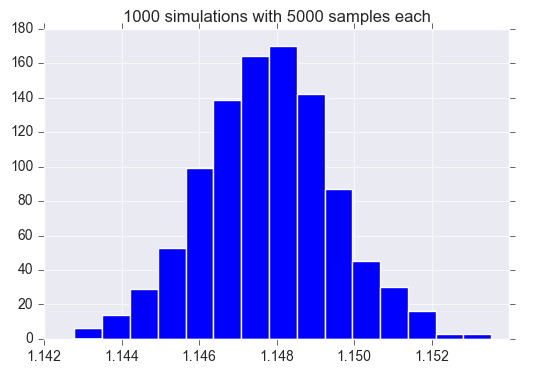

The integral value using the direct method is 1.1478
X ~ Unif(0,1), because X belongs to [0,1] and f(x) = 1, and h(x) = (1+x^2)^(1/2)


In [5]:
# Exercício 1a, método clássico

def h(x):
    return np.sqrt(1+np.power(x,2))

mn_classic = [np.mean(h(np.random.uniform(0,1,5000))) for i in range(0,1000)]
plt.hist(mn_classic, bins=15)
plt.title('1000 simulations with 5000 samples each')
plt.show()
print('The integral value using the direct method is {}'.format(np.round(np.mean(mn_classic),4)))
print('X ~ Unif(0,1), because X belongs to [0,1] and f(x) = 1, and h(x) = (1+x^2)^(1/2)')

___

By the partial integration method we have,

$$
m_2 = \frac{1}{n} \sum_{i=1}^n \left(I + h(X_i) - g(X_i)\right)
$$

Where, $ I = \int _0 ^1 g(x)f(x)dx$, $g(x)=x$, $f(x)=1$ and $h(x)=(1+x^2)^{\frac{1}{2}}$

Therefore, our estimation will be given by (again assuming $X_i$ are i.i.d), 

$$
m_2 = \frac{1}{n}\sum_{i=1}^n \left( \frac{1}{2} + (1+U_i^2)^{\frac{1}{2}} - U_i \right), \ U_i \tilde{}\text{Unif}(0,1)\ \forall i \in \{1,...,n\}
$$

and the variance will be given by,

$$
Var[I + h(X) - g(X)] = \int _0 ^1 \left( h(x)-g(x)\right)^2 f(x)dx - (m-I)^2\\
= \int _0 ^1 \left( (1+x^2)^{\frac{1}{2}} - x\right)^2 dx - \left( \int_0^1 (1+x^2)^{\frac{1}{2}}dx - \int _0 ^1 xdx\right)^2 \approx 0.028
$$

___

The geometrical Monte-Carlo estimation is given by,

$$
m_G = \frac{1}{n} \sum_{i=1}^n \tilde{h}(x_i),\text{ where }\\
\tilde{h}(x_i) = \sqrt{2}, if  x_i \leq \sqrt{(1+x_i^2)} \text{ and 0 otherwise}
$$

It's variance is given by,

$$
Var_G[h(X)] = cm = \sqrt{2} \int_0^1(1+x^2)^{\frac{1}{2}}dx \approx 1.6232 
$$

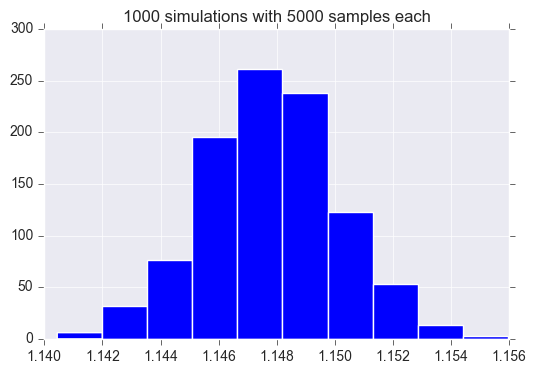

The integral value using the partial integration method is 1.1478
X ~ Unif(0,1), because X belongs to [0,1] and f(x) = 1, h(x) = (1+x^2)^(1/2) and g(x) = x


In [6]:
# Exercício 1a, método da integração parcial

mn_partial = []
for i in range(0,1000):
    X = np.random.uniform(0,1, 5000)
    mn_partial.append(np.mean((1/2) + np.sqrt(1+np.power(X,2)) - X))

plt.hist(mn_partial)
plt.title('1000 simulations with 5000 samples each')
plt.show()
print('The integral value using the partial integration method is {}'.format(np.round(np.mean(mn_partial),4)))
print('X ~ Unif(0,1), because X belongs to [0,1] and f(x) = 1, h(x) = (1+x^2)^(1/2) and g(x) = x')

___

For the both MC methods described in previous item, find the sample size such that the absolute error does not exceed 0.001 with probability 95%.

For this, is given,

$$
P\left(\left|m_n - m \right| < z_{1-\alpha/2} \sqrt{\frac{\text{Var}[X]}{n}}\right) \approx 1 - \alpha
$$


Therefore, $z_{1-\alpha/2}\sqrt{\frac{Var[X]}{n}} = 0.001$, but we want $\alpha$ to be 0.05.

Then, $z_{0.975}\sqrt{\frac{0.024}{n}} = 0.001$, but looking the Z-Distribution table, we have that $z_{0.975}=1.96$ 

Thus, $\left \lceil{n_{\text{direct method}}}\right \rceil  = 92199$ samples.

For the partial integration, we have,

$z_{0.975}\sqrt{\frac{0.028}{n}} = 0.001$  and thus, $\left \lceil{n_{\text{partial integration}}}\right \rceil  = 107565$ samples.



___
$$
I_2 = \int _0 ^1 cos(x)dx = \int _0 ^1 h(x)f(x)dx\\
\text{where } h(x) = cos(x), \text{ and } f(x) = 1 \implies X\tilde{} \text{Unif}(0,1)
$$

For the direct Monte-Carlo integration method,

$$
m_1 = \frac{1}{n} \sum_{i=1}^n h(x_i) = \frac{1}{n} \sum_{i=1}^n cos(Ui)
$$

And for the partial-integration method, taking $g(x) = 1 - 0.4x$,

$$
m_2 = \frac{1}{n} \sum_{i=1}^n (0.8 + cos(U_i) - 1 + 0.4Ui) = \frac{1}{n} \sum_{i=1}^n (0.4Ui -0.2 + cos(U_i)) 
$$

To calculate the variance for the direct (d) and the partial-integration(pi), we have,

$$
\text{Var}_d[h(X)] = \int _0 ^1 cos^2(x) dx - \left( \int_0^1 cos(x)dx \right)^2 \approx 0.01925
$$

And,

$$
\text{Var}_{pi}[I + h(X) - g(X)] = \int _0 ^1 \left( cos(x) - (1-0.4x)\right)^2dx - \left( \int_0^1 cos(x)dx - 0.8 \right)^2 \approx 0.001414
$$ 

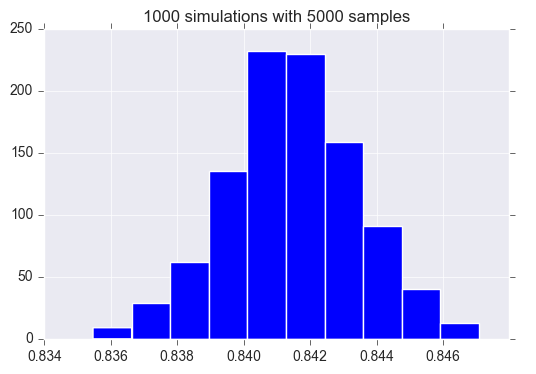

The value given by the estimated integral is 0.8414645341317614


In [14]:
# Simulation for the direct method
num_of_samples, num_of_simulations = 5000, 1000

m1 = []
for i in range(num_of_simulations):
    m_1 = np.mean([np.cos(u1) for u1 in np.random.uniform(0,1,num_of_samples)])
    m1.append(m_1)
    
plt.hist(m1)
plt.title('1000 simulations with 5000 samples')
plt.show()
print('The value given by the estimated integral is {}'.format(np.mean(m1)))

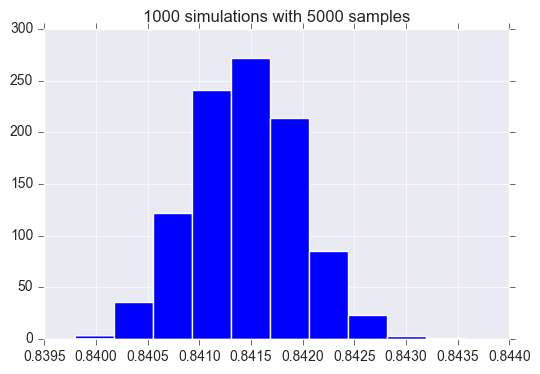

The value given by the estimated integral is 0.8414415417286775


In [18]:
# Simulation for the partial-integration method
num_of_samples, num_of_simulations = 5000, 1000

m2 = []
for i in range(num_of_simulations):
    m_2 = np.mean([0.4*u2 - 0.2 + np.cos(u2) for u2 in np.random.uniform(0,1,num_of_samples)])
    m2.append(m_2)
    
plt.hist(m2)
plt.title('1000 simulations with 5000 samples')
plt.show()
print('The value given by the estimated integral is {}'.format(np.mean(m2)))

___

$$
I_3 = \frac{1}{(2\pi)^5} \int_{-\infty}^{+\infty}... \int_{-\infty}^{+\infty} e^{\frac{-\left(x_1^2+...+x_{10}^2 \right)}{2}}\left( 1+\frac{sin^2(x_1+...+x_{10})}{4}\right)dx_1...dx_{10}
$$

Taking $f(x_1,...,x_{10}) = \frac{exp\left(\frac{-(x_1^2+...+x_{10}^2)}{2}\right) }{\sqrt(2\pi)...\sqrt(2\pi)}= \frac{exp\left( -x_1^2+...+x_{10}^2 \right)/2}{(2\pi)^5}$

and $h(x_1,...,x_{10}) = \left( 1+\frac{sin^2(x_1+...+x_{10})}{4}\right) $

Notice that $f(x_1,...,x_{10})=f(x_1)...f(x_{10})$, where $X_i \tilde{} N(0,1) \ \forall i\in\{1,...,10\}$

Therefore, estimating $I_3$ by the direct method yields,

$$
m_3 = \frac{1}{n} \sum_{i=1}^n h(x_i) = \frac{1}{n} \sum_{i=1}^n \left( 1+\frac{sin^2(x_i^{10})}{4}\right)
$$